# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Mohammad Hajipour 
2.   Student Number: 401301843


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [64]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [65]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = dataset[:int(len(dataset)*0.8)]['X'].to_numpy()
y_train = dataset[:int(len(dataset)*0.8)]['Y'].to_numpy()

x_test = dataset[int(len(dataset)*0.8):len(dataset)]['X'].to_numpy()
y_test = dataset[int(len(dataset)*0.8):len(dataset)]['Y'].to_numpy()

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [66]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.vstack([x_train, np.ones(len(x_train))]).T
m = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y_train)

In [67]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(predicted_train_y, y_train)
test_error = mean_squared_error(predicted_test_y, y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3246776301777423
MSE test error: 0.354495119213003


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

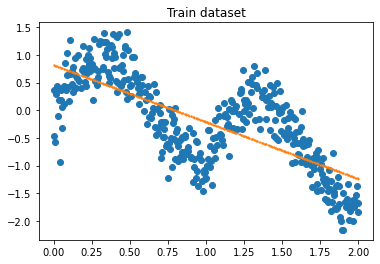

In [68]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

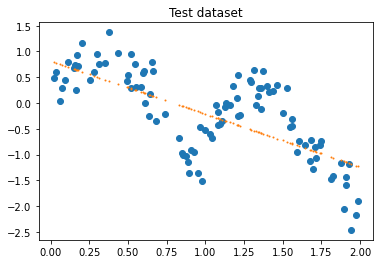

In [69]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

### Part4:
#### Were the reported accuracies acceptable?

No, Because the model can't follow the data and it couldn't predict the data very well and we don't have good fitting in this model.
#### What about the line you drew in the last part?
It also could'nt predict data well in last part
#### Was it appropriate for the dataset?
No, Because our dataset is alittle more complex than model.
#### Explain what are the main problems here.
In this part the data is more complex than the model also as you can see the model is linear regression that predict linear data but in this part our data is non-linear and we can't predict it with this basic model and we need more complex model for predict. 

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, It can work better in this step because it will use in non-linear data and it can locally predict the data very well.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [70]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        the_query_point = np.ravel(the_query_point)
        diff = xi - the_query_point
        W[i, i] = np.exp(-1*np.matmul(np.transpose(diff),diff)/(2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [71]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.matmul(np.linalg.inv(np.matmul(np.matmul(np.transpose(X), W),X)), np.matmul(np.matmul(np.transpose(X), W), train_Y))
    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [72]:
predicted_test = [predict(x_train.reshape(-1,1), y_train.reshape(-1,1), query, 0.02) for query in x_test]
error = mean_squared_error(np.asarray(predicted_test).reshape(-1,1), y_test)
print(f"MSE test error: {error}")

MSE test error: 0.0966317411541886


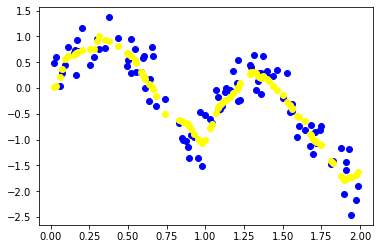

In [73]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

### Part8:
Is the performance of the new model better than the previous one? 

Yes, as you can see the model can predict non-linear data and it works very well in this senario. As I said before Locally Weighted Linear Regression can treat with each small interval datas as linear data and it seems we have multi linear model for predicting non-linear data.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Yes, in most of cases non-parametric models work very well on non-linear data.

### Part10:
Implementing the `KNN model`.

In [74]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y
        
    def distance(self, x1, x2):
        distance = ((x1 - x2)**2).sum(axis=1)**0.5
        return distance

    def return_nn_ids(self, x):
        indices = np.argpartition(self.distance(x, self.X), self.k)[:self.k]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = self.Y[neareest_indices,:].mean(axis=0)[0]
        return predicted_y

In [75]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(np.asarray(predicted_y), y_test)
    return error, predicted_y

In [76]:
k = 7
error_knn, predicted_y = evaluation(k, x_train.reshape(-1,1), y_train.reshape(-1,1), x_test.reshape(-1,1), y_test.reshape(-1,1))
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.09695931959882734


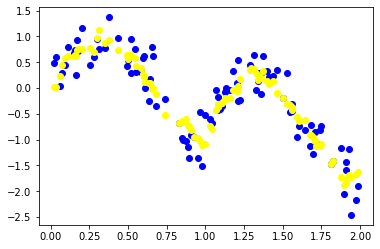

In [77]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

### Implementation Cross-Validation

In [78]:
x_train = dataset[:int(len(dataset)*0.8)]['X'].to_numpy()
y_train = dataset[:int(len(dataset)*0.8)]['Y'].to_numpy()

split = 10

data_chunks = np.array_split(x_train, split)
label_chunks = np.array_split(y_train, split)

index_chunks = np.array_split(np.arange(len(x_train)), num_split)

K = range(1,30,1)
ERR_DICT = {}

for i in K:
    
    sum_err = 0
    
    for data, label, index in zip(data_chunks, label_chunks, index_chunks):
        
        train_x = x_train.copy()
        train_y = y_train.copy()

        test_x = data.reshape(-1,1)
        test_y = label.reshape(-1,1)
        
        train_x = np.delete(train_x, index)
        train_y = np.delete(train_y, index)
        train_x = train_x.reshape(-1,1)
        train_y = train_y.reshape(-1,1)
        
        err, _ = evaluation(i, train_x, train_y, test_x, test_y)
        sum_err = sum_err + err 
        
    ERR_DICT[str(i)] = sum_err / split 
    
Keymax = min(zip(ERR_DICT.values(), ERR_DICT.keys()))   

print('K :', list(K))
print('Best Result Is For : K = ', Keymax[1])
print('Error For This K Is ', Keymax[0])

K : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Best Result Is For : K =  18
Error For This K Is  0.08989752710002616


To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes, It works very well in KNN senario, it means that we will have good prediction in non-linear data by non-parametrci algorithm such as KNN